# Web Scarping & EDA

 In this project, we focus on SaaS (Software as a Service) companies operating in Egypt. Our goal is to extract data from the website "https://getlatka.com/companies/countries/egypt" to collect information about the revenue of these companies. By performing EDA on the scraped data, we aim to gain insights into the revenue distribution, market trends, and key players in the SaaS industry in Egypt.

## Steps:

1. Web Scraping:
   
  - We will use web scraping techniques to extract data from the specified URL, focusing on SaaS companies based in Egypt.
  - The scraping process involves navigating the website's HTML structure, identifying relevant elements such as company names and revenue figures, and extracting this information using Python libraries such as BeautifulSoup.
  - We'll handle pagination if the website has multiple pages of company listings, ensuring comprehensive data collection.

2. Data Cleaning and Preprocessing:

 - Once the data is scraped, we'll perform data cleaning and preprocessing to ensure its quality and usability for analysis.
 - This involves handling missing or erroneous values, standardizing data formats, and converting relevant information into numerical or categorical variables as needed.

3. Exploratory Data Analysis (EDA):

 - With the cleaned dataset, we'll conduct exploratory data analysis to uncover insights and patterns within the SaaS industry in Egypt.
 - We'll explore the distribution of revenue among SaaS companies, identify outliers or anomalies, and analyze trends over time if historical data is available.
 -EDA techniques such as summary statistics, histograms, box plots, and correlation analysis will help us understand the characteristics and dynamics of the SaaS market in Egypt.

### 1. Web Scrapping

In [1]:
#Importing libraries
from bs4 import BeautifulSoup # for extracting data from HTML and XML
import requests #  for making HTTP requests and handling responses/ facilitating web scraping

In [2]:
# Retrieve the content of the webpage located at that address.
url = "https://getlatka.com/companies/countries/egypt"
response = requests.get(url)

let's now use BeautifulSoup to parse the HTML content of the webpage fetched by the 'requests' library.

In [3]:
soup = BeautifulSoup(response.text , "html.parser")
soup.head()

[<meta content="width=device-width" name="viewport"/>,
 <meta charset="utf-8"/>,
 <title>Top 20 SaaS Companies in Egypt Ranked by Revenue, Team Size</title>,
 <meta content="There are 0 SaaS Companies with headquarters in Egypt. These Egypt founders do $132.5M in revenue with 1.9K employees. The top Egypt SaaS company is ITWorx." name="description"/>,
 <meta content="Top 20 SaaS Companies in Egypt Ranked by Revenue, Team Size" property="og:title"/>,
 <meta content="There are 0 SaaS Companies with headquarters in Egypt. These Egypt founders do $132.5M in revenue with 1.9K employees. The top Egypt SaaS company is ITWorx." property="og:description"/>,
 <meta content="https://storage.getlatka.com/images/latka-logo.svg" property="og:image"/>,
 <meta content="Top 20 SaaS Companies in Egypt Ranked by Revenue, Team Size" name="twitter:title"/>,
 <meta content="There are 0 SaaS Companies with headquarters in Egypt. These Egypt founders do $132.5M in revenue with 1.9K employees. The top Egypt Sa

After parsing the content from that website, let's now run a code that will finds all <label> elements in the parsed HTML document using BeautifulSoup and assigns them to the variable 'title'.

In [4]:
title = soup.find_all("label")
title = title [0:5]
title

[<label class="company-row_column_title__tu1Xf">revenue</label>,
 <label class="company-row_column_title__tu1Xf">customers</label>,
 <label class="company-row_column_title__tu1Xf">year founded</label>,
 <label class="company-row_column_title__tu1Xf">funding</label>,
 <label class="company-row_column_title__tu1Xf">team size</label>]

Now, let's run a line of code to create a list called 'head_row' by extracting the text content of each element in the 'title' list (which contains <label> elements) and stripping any leading or trailing whitespace characters.

In [5]:
head_row = [tit.text.strip() for tit in title]
head_row

['revenue', 'customers', 'year founded', 'funding', 'team size']

Let's run another line of code that  will finds the first [a] element with the class 'company-row_name__JoVCq' in the parsed HTML document using BeautifulSoup and retrieves the text content of that element, representing the name of the company.

In [6]:
company_name = soup.find('a', class_='company-row_name__JoVCq').text
company_name

'ITWorx'

Let's selects all elements with the class 'company-row_name__JoVCq' that are children of elements with the class 'company-row_row_container__ux_Oa' in the parsed HTML document using BeautifulSoup. It then extracts the text content of each selected company name element and stores them in the 'company_names' list. Finally, it prints the list of company names.

In [7]:
company_name_elements = soup.select('.company-row_row_container__ux_Oa .company-row_name__JoVCq')

# Extract and print the text content of each company name element
company_names = [element.text for element in company_name_elements]
print("Company Names:", company_names)

Company Names: ['ITWorx', 'Analytics Software', 'Egypt', 'Avelabs', 'Artificial Intelligence Software', 'Egypt', 'Trella', 'B2B Marketplace Platforms', 'Egypt', 'Softec International', 'Artificial Intelligence Software', 'Egypt', 'Digital Planets', 'Security Software', 'Egypt', 'SubsBase', 'Financial Services Software', 'Egypt', 'WideBot', 'Artificial Intelligence Software', 'Egypt', 'ExpandCart', 'E-Commerce Software', 'Egypt', 'Garment IO', 'IoT Software', 'Egypt', 'ON Market E-Grocery Marketplace', 'E-Commerce Software', 'Egypt', 'ProActive Software', 'ERP Software', 'Egypt', 'Untap', 'Cloud Computing Software', 'Egypt', 'Dawarha', 'Artificial Intelligence Software', 'Egypt', 'FlapKap', 'E-Commerce Software', 'Egypt', 'Closet Tools', 'Marketing Software', 'Egypt', 'AKWAD', 'Governance, Risk & Compliance Software', 'Egypt', 'Instatus', 'Other Software', 'Egypt', 'mivors', 'Education Software', 'Egypt', 'Xpovi', 'Other Software', 'Egypt', 'Femto', 'Analytics Software', 'Egypt']


In [8]:
#We can store all the parsed documents in a variable
company_name_elements = soup.select('.company-row_name__JoVCq')
company_name_elements

[<a class="company-row_name__JoVCq" href="/companies/itworx">ITWorx</a>,
 <a class="company-row_name__JoVCq" href="/companies/industries/analytics-software">Analytics Software</a>,
 <a class="company-row_name__JoVCq" href="/companies/countries/egypt">Egypt</a>,
 <a class="company-row_name__JoVCq" href="/companies/avelabs">Avelabs</a>,
 <a class="company-row_name__JoVCq" href="/companies/industries/artificial-intelligence-software">Artificial Intelligence Software</a>,
 <a class="company-row_name__JoVCq" href="/companies/countries/egypt">Egypt</a>,
 <a class="company-row_name__JoVCq" href="/companies/trella">Trella</a>,
 <a class="company-row_name__JoVCq" href="/companies/industries/b2b-marketplace-platforms">B2B Marketplace Platforms</a>,
 <a class="company-row_name__JoVCq" href="/companies/countries/egypt">Egypt</a>,
 <a class="company-row_name__JoVCq" href="/companies/softec-international">Softec International</a>,
 <a class="company-row_name__JoVCq" href="/companies/industries/artif

 we can selects all elements with the class 'company-row_row_info_container__a0nsd' from the parsed HTML document using BeautifulSoup and stores them in the variable 'company_info_containers'. Then, extract the text content of the company name element within each container and stores them in the 'company_names' list using list comprehension. Finally, print the list of company names.

In [9]:
company_info_containers = soup.select('.company-row_row_info_container__a0nsd')

# Extract and print the text content of each company name element
company_names = [container.find('a', class_='company-row_name__JoVCq').text for container in company_info_containers]
print("Company Names:", company_names)

Company Names: ['ITWorx', 'Avelabs', 'Trella', 'Softec International', 'Digital Planets', 'SubsBase', 'WideBot', 'ExpandCart', 'Garment IO', 'ON Market E-Grocery Marketplace', 'ProActive Software', 'Untap', 'Dawarha', 'FlapKap', 'Closet Tools', 'AKWAD', 'Instatus', 'mivors', 'Xpovi', 'Femto']


In [10]:
head_row.insert(0, "Comapany Name")
head_row

['Comapany Name',
 'revenue',
 'customers',
 'year founded',
 'funding',
 'team size']

### 2. Data Cleaning and Preprocessing:

In [11]:
#Let's store our data into a dataframe
import pandas as pd

df = pd.DataFrame (columns = head_row)
df

,Comapany Name,revenue,customers,year founded,funding,team size


After that, we can run a code to find all [span] elements with the class 'company-row_column_value__SbU3_' in the parsed HTML document using BeautifulSoup and extracts the text content of each element, stripping any leading or trailing whitespace characters. Then, it prints the first ten elements of the 'rows' list and the total number of elements in the 'rows' list. This provides a glimpse of the text content of the first ten elements and the total count of elements extracted.

In [12]:
row = soup.find_all("span", class_="company-row_column_value__SbU3_" )
rows = [i.text.strip() for i in row]
print(rows[0:10])
print(len(rows))

['$47.5M', '750K', '1994', '-', '901', '$26.3M', '0', '2012', '-', '240']
100


In [13]:
df.drop(df.index, inplace=True)
df

,Comapany Name,revenue,customers,year founded,funding,team size


In [14]:
for i in range(0, len(rows), len(head_row)-1):
    company_name_index = min(i // (len(head_row)-1), len(company_names) - 1)  # Ensure the index is within bounds
    company_name = company_names[company_name_index]  # Get the corresponding company name
    row_data = [company_name] + rows[i:i + len(head_row)-1]  # Include the company name in the row data
    df.loc[len(df)] = row_data

# Print the DataFrame
data_set = df.head(20)  # Display the first 20 rows

In [15]:
# now we can save our data
data_set.to_csv(r'/content/drive/MyDrive/Egypt_companies_revenue.csv', index = False)

In [16]:
data_set.to_csv('/content/drive/MyDrive/data_set.csv', index=False)

In [17]:
#Load the data
data = pd.read_csv("/content/drive/MyDrive/data_set.csv")
data

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,$47.5M,750K,1994,-,901
1,Avelabs,$26.3M,0,2012,-,240
2,Trella,$15.5M,350,2019,$750K,283
3,Softec International,$13.2M,0,2008,-,162
4,Digital Planets,$13.1M,287,2018,-,34
5,SubsBase,$3.5M,0,2020,$180K,30
6,WideBot,$2.3M,0,2016,$500K,54
7,ExpandCart,$2.2M,20K,2013,$2.7M,39
8,Garment IO,$2M,0,2017,$600K,31
9,ON Market E-Grocery Marketplace,$1.8M,0,2020,$215K,17


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comapany Name  20 non-null     object
 1   revenue        20 non-null     object
 2   customers      20 non-null     object
 3   year founded   20 non-null     int64 
 4   funding        20 non-null     object
 5   team size      20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [19]:
data['team size'].describe()

count     20.000000
mean      95.450000
std      205.637001
min        0.000000
25%       11.750000
50%       23.500000
75%       42.750000
max      901.000000
Name: team size, dtype: float64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data_toNum = data.head(20)
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,$47.5M,750K,1994,-,901
1,Avelabs,$26.3M,0,2012,-,240
2,Trella,$15.5M,350,2019,$750K,283
3,Softec International,$13.2M,0,2008,-,162
4,Digital Planets,$13.1M,287,2018,-,34
5,SubsBase,$3.5M,0,2020,$180K,30
6,WideBot,$2.3M,0,2016,$500K,54
7,ExpandCart,$2.2M,20K,2013,$2.7M,39
8,Garment IO,$2M,0,2017,$600K,31
9,ON Market E-Grocery Marketplace,$1.8M,0,2020,$215K,17


In [22]:
print(data_set.columns)

Index(['Comapany Name', 'revenue', 'customers', 'year founded', 'funding',
       'team size'],
      dtype='object')


In [23]:
data_set

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,$47.5M,750K,1994,-,901
1,Avelabs,$26.3M,0,2012,-,240
2,Trella,$15.5M,350,2019,$750K,283
3,Softec International,$13.2M,0,2008,-,162
4,Digital Planets,$13.1M,287,2018,-,34
5,SubsBase,$3.5M,0,2020,$180K,30
6,WideBot,$2.3M,0,2016,$500K,54
7,ExpandCart,$2.2M,20K,2013,$2.7M,39
8,Garment IO,$2M,0,2017,$600K,31
9,ON Market E-Grocery Marketplace,$1.8M,0,2020,$215K,17


In [24]:
data_toNum['funding'] = data_toNum['funding'].astype(str).apply(lambda x: x.replace('$', '') if isinstance(x, str) else x)
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,$47.5M,750K,1994,-,901
1,Avelabs,$26.3M,0,2012,-,240
2,Trella,$15.5M,350,2019,750K,283
3,Softec International,$13.2M,0,2008,-,162
4,Digital Planets,$13.1M,287,2018,-,34
5,SubsBase,$3.5M,0,2020,180K,30
6,WideBot,$2.3M,0,2016,500K,54
7,ExpandCart,$2.2M,20K,2013,2.7M,39
8,Garment IO,$2M,0,2017,600K,31
9,ON Market E-Grocery Marketplace,$1.8M,0,2020,215K,17


In [25]:
data_toNum['revenue'] = data_toNum['revenue'].astype(str).apply(lambda x: x.replace('$', '') if isinstance(x, str) else x)
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,47.5M,750K,1994,-,901
1,Avelabs,26.3M,0,2012,-,240
2,Trella,15.5M,350,2019,750K,283
3,Softec International,13.2M,0,2008,-,162
4,Digital Planets,13.1M,287,2018,-,34
5,SubsBase,3.5M,0,2020,180K,30
6,WideBot,2.3M,0,2016,500K,54
7,ExpandCart,2.2M,20K,2013,2.7M,39
8,Garment IO,2M,0,2017,600K,31
9,ON Market E-Grocery Marketplace,1.8M,0,2020,215K,17


In [26]:
data_toNum['funding'] = data_toNum['funding'].astype(str).apply(lambda x: x.replace('-', '0') if isinstance(x, str) else x)
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,47.5M,750K,1994,0,901
1,Avelabs,26.3M,0,2012,0,240
2,Trella,15.5M,350,2019,750K,283
3,Softec International,13.2M,0,2008,0,162
4,Digital Planets,13.1M,287,2018,0,34
5,SubsBase,3.5M,0,2020,180K,30
6,WideBot,2.3M,0,2016,500K,54
7,ExpandCart,2.2M,20K,2013,2.7M,39
8,Garment IO,2M,0,2017,600K,31
9,ON Market E-Grocery Marketplace,1.8M,0,2020,215K,17


In [27]:
data_toNum['revenue'] = data_toNum['revenue'].astype(str).apply(lambda x: x.replace('-', '0') if isinstance(x, str) else x)
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,47.5M,750K,1994,0,901
1,Avelabs,26.3M,0,2012,0,240
2,Trella,15.5M,350,2019,750K,283
3,Softec International,13.2M,0,2008,0,162
4,Digital Planets,13.1M,287,2018,0,34
5,SubsBase,3.5M,0,2020,180K,30
6,WideBot,2.3M,0,2016,500K,54
7,ExpandCart,2.2M,20K,2013,2.7M,39
8,Garment IO,2M,0,2017,600K,31
9,ON Market E-Grocery Marketplace,1.8M,0,2020,215K,17


In [28]:
def convert_reunue (value):
    if isinstance (value, str):
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'k' in value:
            return float(value.replace('K', '')) * 1e3
        else:
            return pd.NA
    else:
        return value


In [29]:
data_toNum['revenue'] = data_toNum['revenue'].apply(convert_reunue)
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,47500000.0,750K,1994,0,901
1,Avelabs,26300000.0,0,2012,0,240
2,Trella,15500000.0,350,2019,750K,283
3,Softec International,13200000.0,0,2008,0,162
4,Digital Planets,13100000.0,287,2018,0,34
5,SubsBase,3500000.0,0,2020,180K,30
6,WideBot,2300000.0,0,2016,500K,54
7,ExpandCart,2200000.0,20K,2013,2.7M,39
8,Garment IO,2000000.0,0,2017,600K,31
9,ON Market E-Grocery Marketplace,1800000.0,0,2020,215K,17


In [30]:
data_toNum['revenue'] = pd.to_numeric( data_toNum['revenue'])
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,47500000.0,750K,1994,0,901
1,Avelabs,26300000.0,0,2012,0,240
2,Trella,15500000.0,350,2019,750K,283
3,Softec International,13200000.0,0,2008,0,162
4,Digital Planets,13100000.0,287,2018,0,34
5,SubsBase,3500000.0,0,2020,180K,30
6,WideBot,2300000.0,0,2016,500K,54
7,ExpandCart,2200000.0,20K,2013,2.7M,39
8,Garment IO,2000000.0,0,2017,600K,31
9,ON Market E-Grocery Marketplace,1800000.0,0,2020,215K,17


In [31]:
data_toNum['team size'] = pd.to_numeric( data_toNum['team size'])
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,47500000.0,750K,1994,0,901
1,Avelabs,26300000.0,0,2012,0,240
2,Trella,15500000.0,350,2019,750K,283
3,Softec International,13200000.0,0,2008,0,162
4,Digital Planets,13100000.0,287,2018,0,34
5,SubsBase,3500000.0,0,2020,180K,30
6,WideBot,2300000.0,0,2016,500K,54
7,ExpandCart,2200000.0,20K,2013,2.7M,39
8,Garment IO,2000000.0,0,2017,600K,31
9,ON Market E-Grocery Marketplace,1800000.0,0,2020,215K,17


In [32]:
data_toNum['team size'] = pd.to_numeric( data_toNum['team size'])
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,47500000.0,750K,1994,0,901
1,Avelabs,26300000.0,0,2012,0,240
2,Trella,15500000.0,350,2019,750K,283
3,Softec International,13200000.0,0,2008,0,162
4,Digital Planets,13100000.0,287,2018,0,34
5,SubsBase,3500000.0,0,2020,180K,30
6,WideBot,2300000.0,0,2016,500K,54
7,ExpandCart,2200000.0,20K,2013,2.7M,39
8,Garment IO,2000000.0,0,2017,600K,31
9,ON Market E-Grocery Marketplace,1800000.0,0,2020,215K,17


In [33]:
data_toNum['year founded'] = pd.to_numeric( data_toNum['year founded'])
data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,47500000.0,750K,1994,0,901
1,Avelabs,26300000.0,0,2012,0,240
2,Trella,15500000.0,350,2019,750K,283
3,Softec International,13200000.0,0,2008,0,162
4,Digital Planets,13100000.0,287,2018,0,34
5,SubsBase,3500000.0,0,2020,180K,30
6,WideBot,2300000.0,0,2016,500K,54
7,ExpandCart,2200000.0,20K,2013,2.7M,39
8,Garment IO,2000000.0,0,2017,600K,31
9,ON Market E-Grocery Marketplace,1800000.0,0,2020,215K,17


In [34]:
data_toNum['customers'] = pd.to_numeric(data_toNum['customers'].replace('K', '', regex=True), errors='coerce')

# Multiply 'customers' column by 1e3
data_toNum['customers'] *= 1e3

data_toNum

,Comapany Name,revenue,customers,year founded,funding,team size
0,ITWorx,47500000.0,750000.0,1994,0,901
1,Avelabs,26300000.0,0.0,2012,0,240
2,Trella,15500000.0,350000.0,2019,750K,283
3,Softec International,13200000.0,0.0,2008,0,162
4,Digital Planets,13100000.0,287000.0,2018,0,34
5,SubsBase,3500000.0,0.0,2020,180K,30
6,WideBot,2300000.0,0.0,2016,500K,54
7,ExpandCart,2200000.0,20000.0,2013,2.7M,39
8,Garment IO,2000000.0,0.0,2017,600K,31
9,ON Market E-Grocery Marketplace,1800000.0,0.0,2020,215K,17


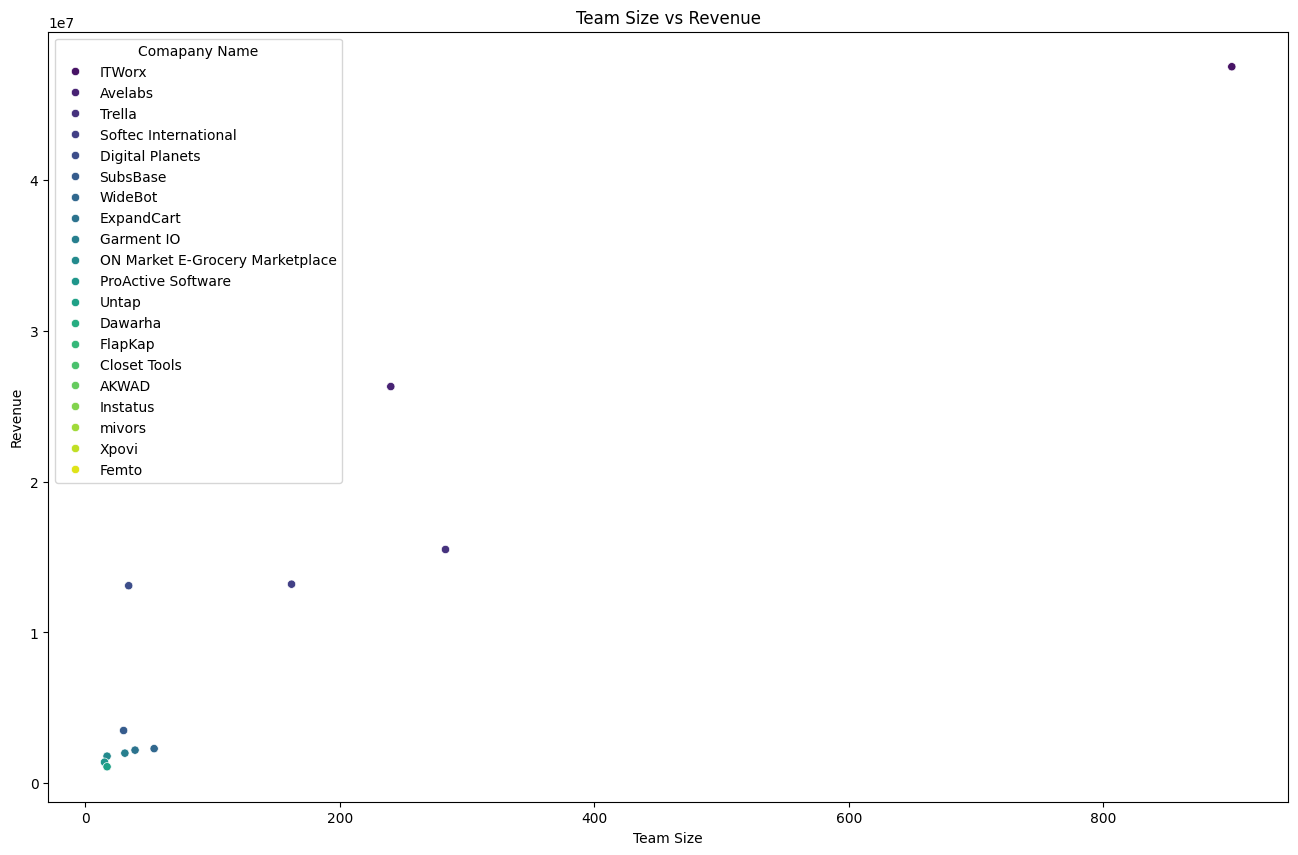

In [35]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='team size', y='revenue', data=data_toNum, hue='Comapany Name', palette='viridis')
plt.title('Team Size vs Revenue')
plt.xlabel('Team Size')
plt.ylabel('Revenue')
plt.show()

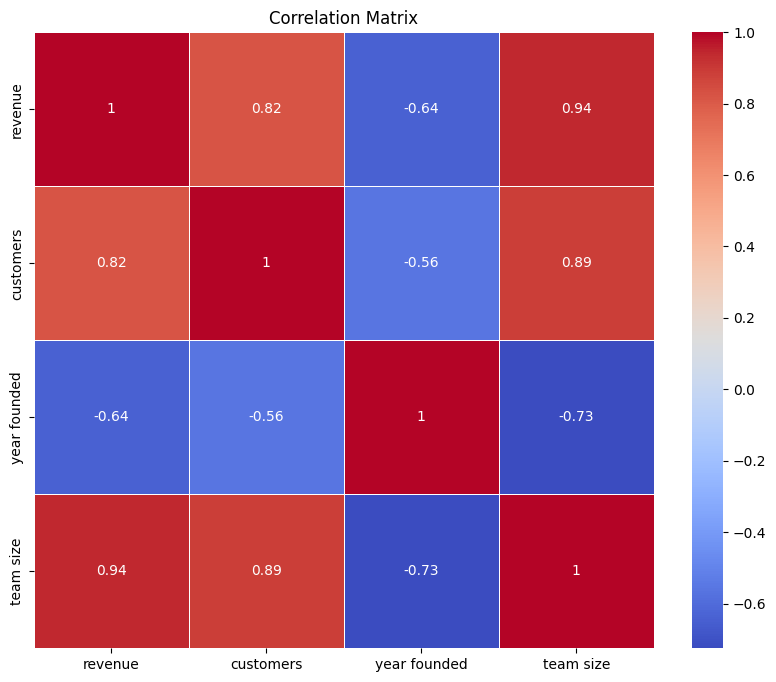

In [36]:
correlation_matrix = data_toNum[['revenue',
 'customers',
 'year founded',
 'team size']]
correlation_mat=correlation_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()